# Price of an apartment rental listing based on the listing content

### Import libraries

In [317]:
from sys import getsizeof
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Problems for this project

* **Introduction. Write your answers in the Intro section of your notebook**

    * To get started, please write 5 examples of the application of ML methods in life. What is the benefit of using machine learning methods in each of your examples?
    * Use the classification of tasks in the introduction to decide which class you can assign to the tasks from the table above and to the 5 examples you provided.
    * Think about what the difference is between multiclass and multilabel.
    * Is an example case with house prices from the theory a classification of a regression problem? Is it possible to reduce the regression problem to classification?<br><br>

* **Introduction to Data Analysis**

    * Import the libraries pandas, numpy, sklearn, lightgbm, scipy, statsmodels, matplotlib, seaborn. Use pip install if necessary.
    * Load data from kaggle using pandas. You only need table data and train.json.
    * What is the size of your data?
    * Print the list of columns. Which column is a target?
    * Make a quick analysis of the data: use the methods info(), describe(), corr(). Explain the results of the outputs. Are there any empty columns?
    * We'll work with only 3 features: 'bathrooms', 'bedrooms', 'interest_level' and with the target column 'price'. Create a dataframe with only these columns.<br><br>

* **Statistical Data Analysis**

    * To get started with statistical data analysis, we recommend that you refresh your basic knowledge of statistics, such as Mean / Median / Mode / Variance / Standard Deviation. Also you are welcome to be free with distributions (Discrete uniform Distribution, Bernoulli Distribution, Binomial Distribution, Poisson Distribution, Normal Distribution, Exponential Distribution). Please make sure that you know the definitions of outliers, percentiles, confidential intervals. The article will be presented later.
        
    * Have a quick look at [this article](https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf). Please pay attention to such aspects as distributions and histograms, boxplots, outliers, kernel density function
    
    * **Target analysis**
        * Plot a histogram to understand the distribution of the target. Is it all clear?
        * The next step is boxplot(). What can you say about the target? Are there any outliers?
        * Drop the rows that are outside the 1 and 99 percentiles from the target column.
        * Plot another histogram for price. Explain the result.<br><br>
    
    * **Characteristics Analysis**
    
        * What is the type of column 'interest_level'?
        * Print the values in this column. How many entries does each value contain?
        * Decode these values. For example, you can replace each value with 0, 1, or 2.
        * Plot histograms for the features 'bathrooms', 'bedrooms'. Are there any outliers?<br><br>
    
    * **Complex analysis**
    
        * Plot a correlation matrix to understand the correlation between features and target. Plot a heat map for the correlation matrix. Is there a correlation?
        * Plot a scatterplot to visualize the correlation between the features and the target. You should return 3 plots where the X-axis is the target and the Y-axis is a feature.<br><br>

* **Creating Features**

    * This step is very broad. You can create as many features as you want. For example, you can add 3 new features that are squared: 'bathrooms_squared', 'bedrooms_squared', ''interest_level_squared'. Plot a correlation matrix with the new features. Are the new features more correlated with the target than the basic features?
    * To train the model here, we will not use your new features. Remember this example and use it in Lecture 2. To train the model, we will only consider the features 'bathrooms' and 'bedrooms'.
    * Read this Sklearn info about PolynomialFeatures.
    * To use PolynomialFeatures, we first need to split the data into training and test samples. We have already done this for you, please read the training and test data.
    * Initialize PolynomialFeatures() with a degree of 10.
    * Apply PolynomialFeatures() to fit and transform your training and test data.<br><br>


* Now you need to train 3 models: linear regression, decision tree and native model. We will use them as black boxes without deep understanding

    * **Results table**

        * Create two empty Pandas DataFrames with columns 'model', 'train', 'test'. Let's call the first one result_MAE and the second one result_RMSE. We will fill these tables with the results of the models.<br><br>

    * **Linear Regression**

        * Initialize linear regression from sklearn with no parameters.
        * Fit your model and make predictions on training and test features. Save it as new columns in data.
        * Compute MAE (Mean Absolute Error) on training and test targets.
        * Calculate RMSE (Root Mean Square Error) on training and test objectives.
        * Insert your metrics into tables result_MAE and result_RMSE with model name 'linear_regression'.<br><br>

    * **Decision Tree**

        * Initialize decision tree regressor from sklearn with fixed random_state=42.
        * Fit it to train features and train target and make prediction on train and test features. Save it as a new column in data.
        * Compute MAE (Mean Absolute Error) on train and test targets.
        * Compute RMSE (Root Mean Square Error) on train and test targets.
        * Insert your metrics into tables result_MAE and result_RMSE with model name 'decision_tree'.<br><br>

    * **Native Models**

        * Calculate the mean and median of 'price' on the training and test data and create a column with these values.
        * Calculate the MAE on the training and test targets between your target and the calculated mean and median.
        * Calculate the RMSE on the training and test targets between your target and the calculated mean and median.
        * Insert your metrics into tables result_MAE and result_RMSE with model names 'native_mean' and 'native_median'.<br><br>

    * **Compare the results**

        * Print your final result_MAE and result_RMSE tables.
        * Which is the best model?

## Intro section

1) **Predict house price**: *regression task* (the price of any house is a real number)

2) **Predict whether a client returns a loan**: *classification task* (all clients can be grouped into "good" and "bad")

3) **Predict when a patient needs to take medicine**: *classification task* (all patients can be arranged into 2 classes: "need the medicine" / "don't need the medicine"

4) **Choose what medicine out of available a patient should take**: *multiclass classification task* (we can number all types of medicines)

5) **Choose segment of clients for a promo communication**: *clastering task* (we should find the best group for our promo)

6) **Recognition of defective products on the production line (based on photo scans)**: *classification task* (broken or not broken)

7) **Decide how to place products on a shelf in a store**: *association task* (we have to find relations between our products and their arrangement on the shelf)

8) **Search sites for input text query**: *clustering task*

9) **Split customers of a store into segments to understand differences of their behavior**: *clastering task* (we need to split our customets)

10) **Detect anomaly in site traffic**: *association task* (we don't have target values, so we need to detect relations dealing with anomaly)

**5 examples of the application ML**

* **Determination sick and healthy people**: *classification task* (benefit: machine will analyze a big set of data and will find pattern much faster than any person)
* **Prediction age of a person using photo**: *classification task* (benefit: machine will use pattern of the data, because people are often wrong about detecting age of other people)
* **Dividing people into subgroups to choose the best gift for them**: *clastering task* (benefit: machine will arrange people into different groups according to their features and it'll be more precise)
* **Rating precision of a product**: *regression* (benefit: machine will analyze a lot of data and be able to rate the quality of a good using patterns in data)
* **Construction duration forecast**: *regression* (benefit: machine will be more faster in analysing patterns in features)

**What the difference is between multiclass and multilabel?**

I think, that in multilabel classification an object can be classified as several classes at a time. In multiclass classification there is only a class that the object can have

*An example case with house prices is from regression theory, because a price of any house is a real number*

## Introduction to Data Analysis

In [318]:
data = pd.read_json("./data/train.json", orient="columns")

data.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [319]:
print(f"Размер данных {getsizeof(data) / (2 ** 20)} Mb")

Размер данных 64.57808017730713 Mb


In [320]:
print(*data.columns, sep="\n")

bathrooms
bedrooms
building_id
created
description
display_address
features
latitude
listing_id
longitude
manager_id
photos
price
street_address
interest_level


*It's clear, that target column is* **price**

In [321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


Из этой информации видим, что:
* Индексы DataFrame разбросаны и стоит применить ```reset_index()```
* Какие у нас есть колонки и какого они типа данных:
<br>3: float64
<br>3: int64
<br>9: object
* Оценочное значение занимаемой памяти: 6+ Mb
* Среди данных нет пустных Null значений

In [322]:
data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


Из этой информации видим:
* Общее количество ненулевых данных в каждом столбце
* Выборочное мат. ожидание и стандартное отклонение
* 25%, 50% и 75% (это процентили, то есть если из выборки получить вариационный ряд, то 25% всего вариационного ряда будут лежать левее (включительно) и т.д.)
* Минимальное и максимальное значение столбца

In [323]:
data.select_dtypes(include="number").corr()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


* Данный метод возвращает таблицу корреляции для каждых столбцов DataFrame
* По диагонали всегда будет 1, потому что признак линейно зависим сам с собой с коэффициентом 1
* Практически линейно зависимы долгота и широта, что в целом логично, потому что все квартиры расположены в черте города, где в целом будут одни и те же координаты
* Небольшая корреляция наблюдается среди количеством спален и ванных комнат в выборке
* Остальные значения показывают, что столбцы кроме рассматриваемых почти линейно независимы

In [324]:
data = data[["bathrooms", "bedrooms", "interest_level", "price"]].reset_index(drop=True)
data.head(5)

,bathrooms,bedrooms,interest_level,price
0,1.0,1,medium,2400
1,1.0,2,low,3800
2,1.0,2,medium,3495
3,1.5,3,medium,3000
4,1.0,0,low,2795


## Statistical Data Analysis

In [325]:
data

,bathrooms,bedrooms,interest_level,price
0,1.0,1,medium,2400
1,1.0,2,low,3800
2,1.0,2,medium,3495
3,1.5,3,medium,3000
4,1.0,0,low,2795
...,...,...,...,...
49347,1.0,3,low,2800
49348,1.0,2,medium,2395
49349,1.0,1,medium,1850
49350,1.0,2,medium,4195


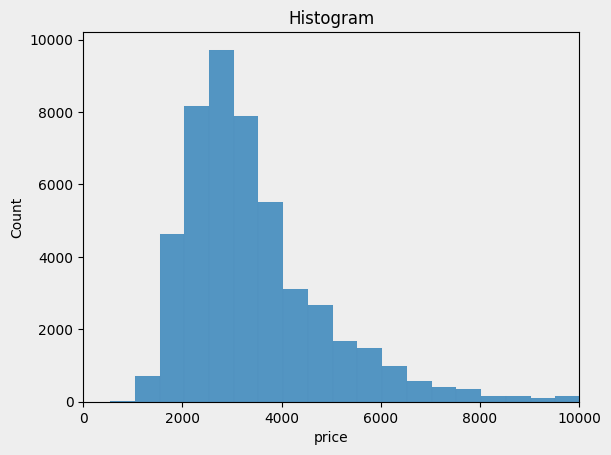

In [326]:
sns.histplot(data=data, x="price", bins=9000)
plt.xlim(0, 10000)
plt.title("Histogram")

plt.gcf().set_facecolor("#eeeeee")
plt.gca().set_facecolor("#eeeeee")

*Distribution is close to a normal distribution, but it has significant right side*

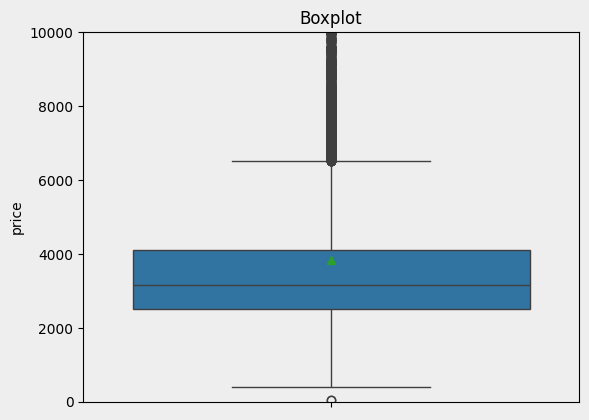

In [327]:
sns.boxplot(y="price", data=data, showmeans=True)
plt.ylim(0, 10000)
plt.title("Boxplot")

plt.gcf().set_facecolor("#eeeeee")
plt.gca().set_facecolor("#eeeeee")

* *50% of all prices are between* **~2250** *and* **~4100**
* *IQR is* **~1850**
* *Median is close to* **2250**
* *Mean is about* **4000**
* *There are* **a lot of outliers above the boxplot**

In [328]:
q1, q99 = data["price"].quantile(q=[0.01, 0.99])
data = data[(q1 <= data["price"]) & (data["price"] <= q99)].reset_index(drop=True)

data

,bathrooms,bedrooms,interest_level,price
0,1.0,1,medium,2400
1,1.0,2,low,3800
2,1.0,2,medium,3495
3,1.5,3,medium,3000
4,1.0,0,low,2795
...,...,...,...,...
48374,1.0,3,low,2800
48375,1.0,2,medium,2395
48376,1.0,1,medium,1850
48377,1.0,2,medium,4195


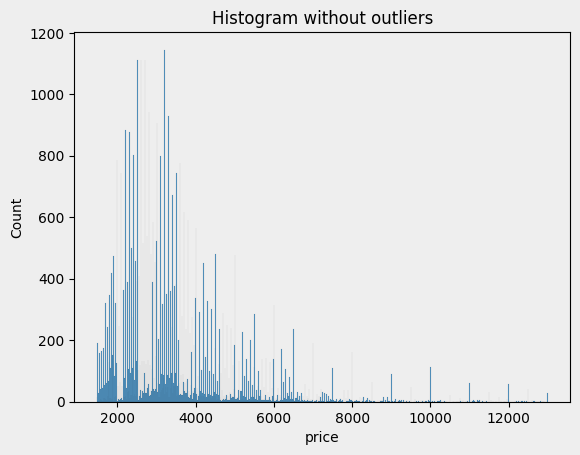

In [329]:
sns.histplot(x="price", data=data, bins=900)
plt.title("Histogram without outliers")

plt.gcf().set_facecolor("#eeeeee")
plt.gca().set_facecolor("#eeeeee")

The first time we built an histogram there were a lot of outliers, so I decided to cut the range of shown values using ```xlim()```. This time we deleted 2 percents of outliers and we can distinguish different columns without cutting

<br><br>Type of column 'interest_level' is **object**

In [330]:
data["interest_level"].value_counts()

interest_level
low       33697
medium    11116
high       3566
Name: count, dtype: int64

In [331]:
mapping = {"low": 0, "medium": 1, "high": 2}
data["interest_level"] = data["interest_level"].apply(lambda x: mapping[x])

data

,bathrooms,bedrooms,interest_level,price
0,1.0,1,1,2400
1,1.0,2,0,3800
2,1.0,2,1,3495
3,1.5,3,1,3000
4,1.0,0,0,2795
...,...,...,...,...
48374,1.0,3,0,2800
48375,1.0,2,1,2395
48376,1.0,1,1,1850
48377,1.0,2,1,4195


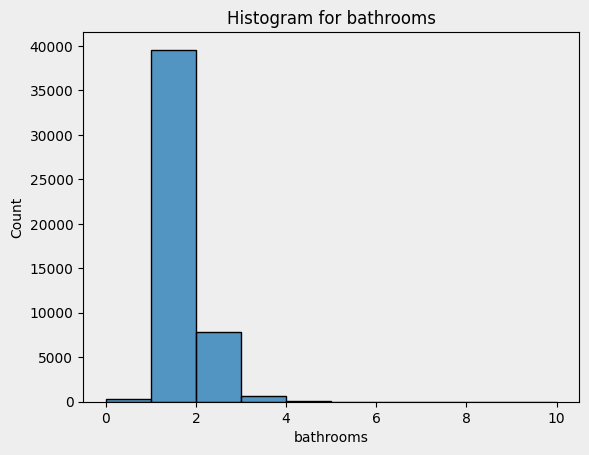

In [332]:
sns.histplot(x="bathrooms", data=data, bins=10)
plt.title("Histogram for bathrooms")

plt.gcf().set_facecolor("#eeeeee")
plt.gca().set_facecolor("#eeeeee")

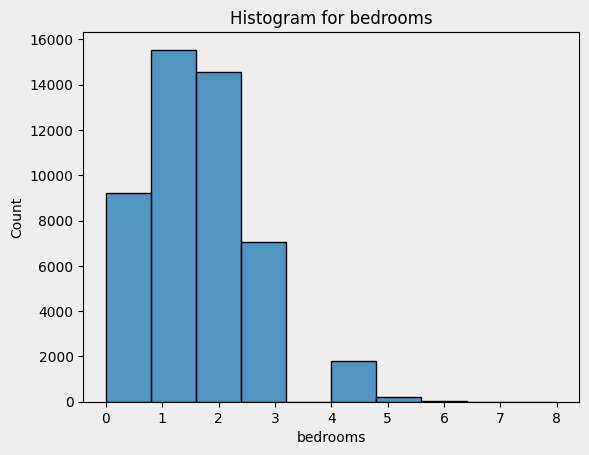

In [333]:
sns.histplot(data=data, x="bedrooms", bins=10)
plt.title("Histogram for bedrooms")

plt.gca().set_facecolor("#eeeeee")
plt.gcf().set_facecolor("#eeeeee")

There are outliers for bathrooms: **10 bathrooms in a flat**, for bedrooms: **8 bedrooms in a flat**

In [334]:
data.corr()

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.517574,-0.063635,0.671943
bedrooms,0.517574,1.000000,0.050654,0.545948
interest_level,-0.063635,0.050654,1.000000,-0.200111
price,0.671943,0.545948,-0.200111,1.000000


Text(0.5, 1.0, 'Matrix of correlation')

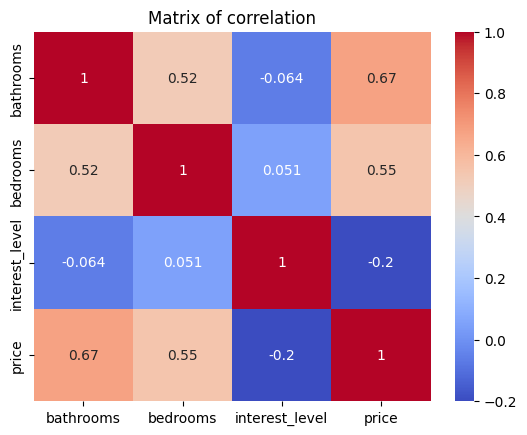

In [335]:
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, cbar=True)
plt.title("Matrix of correlation")

*There isn't a correlation between price and features*

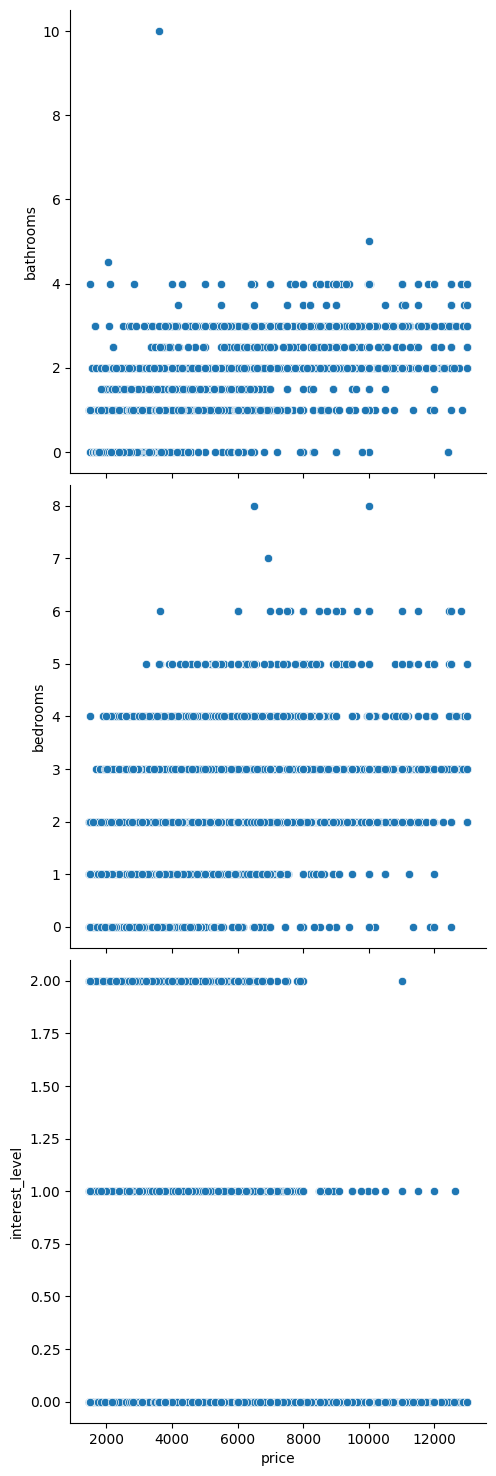

In [336]:
sns.pairplot(data=data, x_vars=["price"], y_vars=["bathrooms", "bedrooms", "interest_level"], height=5)

plt.show()

## Creating Features

In [337]:
new_features = pd.concat([pd.Series(np.sin(data["bedrooms"].values), name="sin_bedrooms"),
                          pd.Series(np.exp(data["bathrooms"].values), name="exp_bathrooms"),
                          pd.Series(np.cos(data["interest_level"].values), name="cos_interest_level"),
                          data["price"]], axis=1)

new_features.head(5)

,sin_bedrooms,exp_bathrooms,cos_interest_level,price
0,0.841471,2.718282,0.540302,2400
1,0.909297,2.718282,1.000000,3800
2,0.909297,2.718282,0.540302,3495
3,0.141120,4.481689,0.540302,3000
4,0.000000,2.718282,1.000000,2795


In [338]:
new_features.corr()

,sin_bedrooms,exp_bathrooms,cos_interest_level,price
sin_bedrooms,1.000000,-0.004748,0.026466,-0.162118
exp_bathrooms,-0.004748,1.000000,0.004520,0.020701
cos_interest_level,0.026466,0.004520,1.000000,0.190818
price,-0.162118,0.020701,0.190818,1.000000


In [339]:
data.corr()

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.517574,-0.063635,0.671943
bedrooms,0.517574,1.000000,0.050654,0.545948
interest_level,-0.063635,0.050654,1.000000,-0.200111
price,0.671943,0.545948,-0.200111,1.000000


The correlation *between prices and new bedrooms features has been changed a lot*: from **0.545948** to **-0.162118**<br>
The correlation *between prices and new bathrooms features has been changed a lot*: from **0.671943** to **0.020701**<br>
The correlation *between prices and new interest level features hasn't been changed*: from **-0.200111** to **0.190818**

In [340]:
## Before using PolynomialFeatures we have to upload the test and the train samples from the file
test_sample = pd.read_json("./data/test.json", orient="columns")[["bathrooms", "bedrooms", "price"]]

quan_1, quan_99 = test_sample["price"].quantile(q=[0.01, 0.99])
test_sample = test_sample[(quan_1 < test_sample["price"]) & (quan_99 > test_sample["price"])]

test_sample.reset_index(drop=True, inplace=True)

test_sample

,bathrooms,bedrooms,price
0,1.0,1,2950
1,1.0,2,2850
2,1.0,0,2295
3,1.0,2,2900
4,1.0,1,3254
...,...,...,...
73125,1.0,1,1700
73126,1.0,2,4195
73127,1.0,0,2400
73128,2.0,2,6895


In [341]:
train_sample = pd.read_json("./data/train.json", orient="columns")[["bathrooms", "bedrooms", "price"]]

quan_1, quan_99 = train_sample["price"].quantile(q=[0.01, 0.99])
train_sample = train_sample[(quan_1 < train_sample["price"]) & (quan_99 > train_sample["price"])]

train_sample.reset_index(drop=True, inplace=True)

train_sample

,bathrooms,bedrooms,price
0,1.0,1,2400
1,1.0,2,3800
2,1.0,2,3495
3,1.5,3,3000
4,1.0,0,2795
...,...,...,...
48338,1.0,3,2800
48339,1.0,2,2395
48340,1.0,1,1850
48341,1.0,2,4195


In [342]:
feature_maker = PolynomialFeatures(degree=10)

In [343]:
new_test_features = feature_maker.fit_transform(test_sample[["bathrooms", "bedrooms"]])
column_names = feature_maker.get_feature_names_out(["bathrooms", "bedrooms"])
target_column = test_sample["price"]

test_sample = pd.DataFrame(new_test_features, columns=column_names)
test_sample = test_sample.join([target_column], how="inner")

test_sample

,1,bathrooms,bedrooms,bathrooms^2,bathrooms bedrooms,bedrooms^2,bathrooms^3,bathrooms^2 bedrooms,bathrooms bedrooms^2,bedrooms^3,...,bathrooms^8 bedrooms^2,bathrooms^7 bedrooms^3,bathrooms^6 bedrooms^4,bathrooms^5 bedrooms^5,bathrooms^4 bedrooms^6,bathrooms^3 bedrooms^7,bathrooms^2 bedrooms^8,bathrooms bedrooms^9,bedrooms^10,price
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2950
1,1.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,4.0,8.0,...,4.0,8.0,16.0,32.0,64.0,128.0,256.0,512.0,1024.0,2850
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2295
3,1.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,4.0,8.0,...,4.0,8.0,16.0,32.0,64.0,128.0,256.0,512.0,1024.0,2900
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73125,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1700
73126,1.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,4.0,8.0,...,4.0,8.0,16.0,32.0,64.0,128.0,256.0,512.0,1024.0,4195
73127,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2400
73128,1.0,2.0,2.0,4.0,4.0,4.0,8.0,8.0,8.0,8.0,...,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,6895


In [344]:
new_train_features = feature_maker.fit_transform(train_sample[["bathrooms", "bedrooms"]])
column_names = feature_maker.get_feature_names_out(["bathrooms", "bedrooms"])
target_column = train_sample["price"]

train_sample = pd.DataFrame(new_train_features, columns=column_names)
train_sample = train_sample.join(target_column, how="inner")

train_sample

,1,bathrooms,bedrooms,bathrooms^2,bathrooms bedrooms,bedrooms^2,bathrooms^3,bathrooms^2 bedrooms,bathrooms bedrooms^2,bedrooms^3,...,bathrooms^8 bedrooms^2,bathrooms^7 bedrooms^3,bathrooms^6 bedrooms^4,bathrooms^5 bedrooms^5,bathrooms^4 bedrooms^6,bathrooms^3 bedrooms^7,bathrooms^2 bedrooms^8,bathrooms bedrooms^9,bedrooms^10,price
0,1.0,1.0,1.0,1.00,1.0,1.0,1.000,1.00,1.0,1.0,...,1.000000,1.000000,1.000000,1.00000,1.0000,1.000,1.00,1.0,1.0,2400
1,1.0,1.0,2.0,1.00,2.0,4.0,1.000,2.00,4.0,8.0,...,4.000000,8.000000,16.000000,32.00000,64.0000,128.000,256.00,512.0,1024.0,3800
2,1.0,1.0,2.0,1.00,2.0,4.0,1.000,2.00,4.0,8.0,...,4.000000,8.000000,16.000000,32.00000,64.0000,128.000,256.00,512.0,1024.0,3495
3,1.0,1.5,3.0,2.25,4.5,9.0,3.375,6.75,13.5,27.0,...,230.660156,461.320312,922.640625,1845.28125,3690.5625,7381.125,14762.25,29524.5,59049.0,3000
4,1.0,1.0,0.0,1.00,0.0,0.0,1.000,0.00,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.0000,0.000,0.00,0.0,0.0,2795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48338,1.0,1.0,3.0,1.00,3.0,9.0,1.000,3.00,9.0,27.0,...,9.000000,27.000000,81.000000,243.00000,729.0000,2187.000,6561.00,19683.0,59049.0,2800
48339,1.0,1.0,2.0,1.00,2.0,4.0,1.000,2.00,4.0,8.0,...,4.000000,8.000000,16.000000,32.00000,64.0000,128.000,256.00,512.0,1024.0,2395
48340,1.0,1.0,1.0,1.00,1.0,1.0,1.000,1.00,1.0,1.0,...,1.000000,1.000000,1.000000,1.00000,1.0000,1.000,1.00,1.0,1.0,1850
48341,1.0,1.0,2.0,1.00,2.0,4.0,1.000,2.00,4.0,8.0,...,4.000000,8.000000,16.000000,32.00000,64.0000,128.000,256.00,512.0,1024.0,4195


## Training 3 models

In [345]:
column_names = ["model", "train", "test"]
column_types = {"model": "object", "train": float, "test": float}
result_MAE, result_RMSE = pd.DataFrame(columns=column_names).astype(column_types), pd.DataFrame(columns=column_names).astype(column_types)

In [346]:
def get_pattern(model, name, train_sample, test_sample, target_num, result_MAE, result_RMSE):
    model.fit(train_sample.iloc[:, :target_num], train_sample.iloc[:, target_num])

    train_predicts = pd.Series(model.predict(train_sample.iloc[:, :target_num]), name=f"{name}_predicts")
    test_predicts = pd.Series(model.predict(test_sample.iloc[:, :target_num]), name=f"{name}_predicts")

    test_sample = test_sample.join([test_predicts], how="inner")
    train_sample = train_sample.join([train_predicts], how="inner")

    rmse = {"model": name,
            "train": root_mean_squared_error(train_sample.iloc[:, target_num - 1], train_sample.iloc[:, -1]),
            "test": root_mean_squared_error(test_sample.iloc[:, target_num - 1], test_sample.iloc[:, -1])}

    mae =  {"model": name,
            "train": mean_absolute_error(train_sample.iloc[:, target_num - 1], train_sample.iloc[:, -1]),
            "test": mean_absolute_error(test_sample.iloc[:, target_num - 1], test_sample.iloc[:, -1])}
    
    return pd.concat([result_RMSE, pd.DataFrame([rmse])], ignore_index=True, axis=0), pd.concat([result_MAE, pd.DataFrame([mae])], ignore_index=True, axis=0), train_sample, test_sample

In [347]:
# Linear model
model = LinearRegression()

result_RMSE, result_MAE, train_sample, test_sample = get_pattern(model, "linear_regression", train_sample, test_sample, -1, result_MAE, result_RMSE)

In [348]:
# Decision Tree model
model = DecisionTreeRegressor(random_state=42)

result_RMSE, result_MAE, train_sample, test_sample = get_pattern(model, "decision_tree", train_sample, test_sample, -2, result_MAE, result_RMSE)

print(result_RMSE, end="\n\n\n")
print(result_MAE)

               model        train          test
0  linear_regression  1070.669027  3.842902e+18
1      decision_tree  1070.598967  1.072573e+03


               model       train          test
0  linear_regression  753.679394  1.421057e+16
1      decision_tree  753.675997  7.562404e+02


In [349]:
# Native mode
test_mode, test_mean = test_sample.iloc[:, -3].mode().values[0], test_sample.iloc[:, -3].mean()
train_mode, train_mean = train_sample.iloc[:, -3].mode(), train_sample.iloc[:, -3].mean()

test_mode = np.full(len(test_sample), test_mode, dtype=int)
test_mean = np.full(len(test_sample), test_mean, dtype=float)
train_mode = np.full(len(train_sample), train_mode, dtype=int)
train_mean = np.full(len(train_sample), train_mean, dtype=float)

In [350]:
def get_pattern_naive(name, y_true_train, y_true_test, y_pred_train, y_pred_test):

    global result_RMSE, result_MAE
    
    rmse = {"model": name,
        "train": root_mean_squared_error(y_true_train, y_pred_train),
        "test": root_mean_squared_error(y_true_test, y_pred_test)}

    mae =  {"model": name,
        "train": mean_absolute_error(y_true_train, y_pred_train),
        "test": mean_absolute_error(y_true_test, y_pred_test)}

    result_RMSE = pd.concat([result_RMSE, pd.DataFrame([rmse])], ignore_index=True, axis=0)
    result_MAE = pd.concat([result_MAE, pd.DataFrame([mae])], ignore_index=True, axis=0)

In [351]:
get_pattern_naive("native_mean", train_sample.iloc[:, -3], test_sample.iloc[:, -3], train_mean, test_mean)
get_pattern_naive("native_mode", train_sample.iloc[:, -3], test_sample.iloc[:, -3], train_mode, test_mode)

print(result_RMSE, end="\n\n\n")
print(result_MAE)

               model        train          test
0  linear_regression  1070.669027  3.842902e+18
1      decision_tree  1070.598967  1.072573e+03
2        native_mean  1585.609099  1.573220e+03
3        native_mode  1893.601698  1.879126e+03


               model        train          test
0  linear_regression   753.679394  1.421057e+16
1      decision_tree   753.675997  7.562404e+02
2        native_mean  1134.361473  1.128895e+03
3        native_mode  1233.416937  1.229270e+03


The best model is **decision tree**